# Sales Prediction Model

* KOLLI. SRI LAKSHMI
* A machine learning model to predict how much of a product will buy in future. ALGORITHM : Random Forest Regressor INPUT : Sales regarding 3 products OUTPUT: Total sales values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

In [2]:
df=pd.read_csv('/home/sri/Downloads/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
56,57,7.3,28.1,41.4,5.5
96,97,197.6,3.5,5.9,11.7
120,121,141.3,26.8,46.2,15.5
85,86,193.2,18.4,65.7,15.2
103,104,187.9,17.2,17.9,14.7


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df=df.drop(columns='Unnamed: 0', axis=1)

In [7]:
df.shape

(200, 4)

In [8]:
df.sample(2)

,TV,Radio,Newspaper,Sales
96,197.6,3.5,5.9,11.7
47,239.9,41.5,18.5,23.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


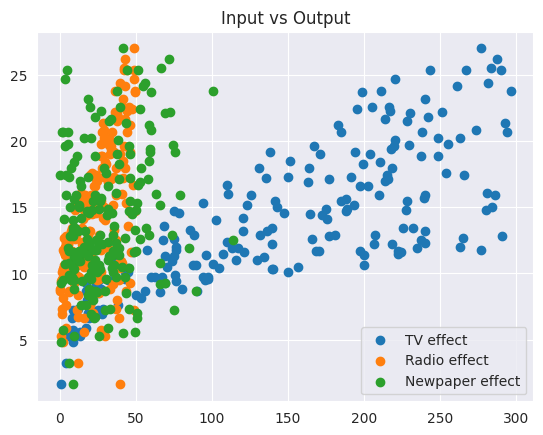

In [12]:
#Data visualization
plt.scatter(df.TV,df.Sales,label='TV effect')
plt.scatter(df.Radio,df.Sales,label = 'Radio effect')
plt.scatter(df.Newspaper,df.Sales,label = 'Newpaper effect')
plt.legend()
plt.title('Input vs Output')
plt.show()


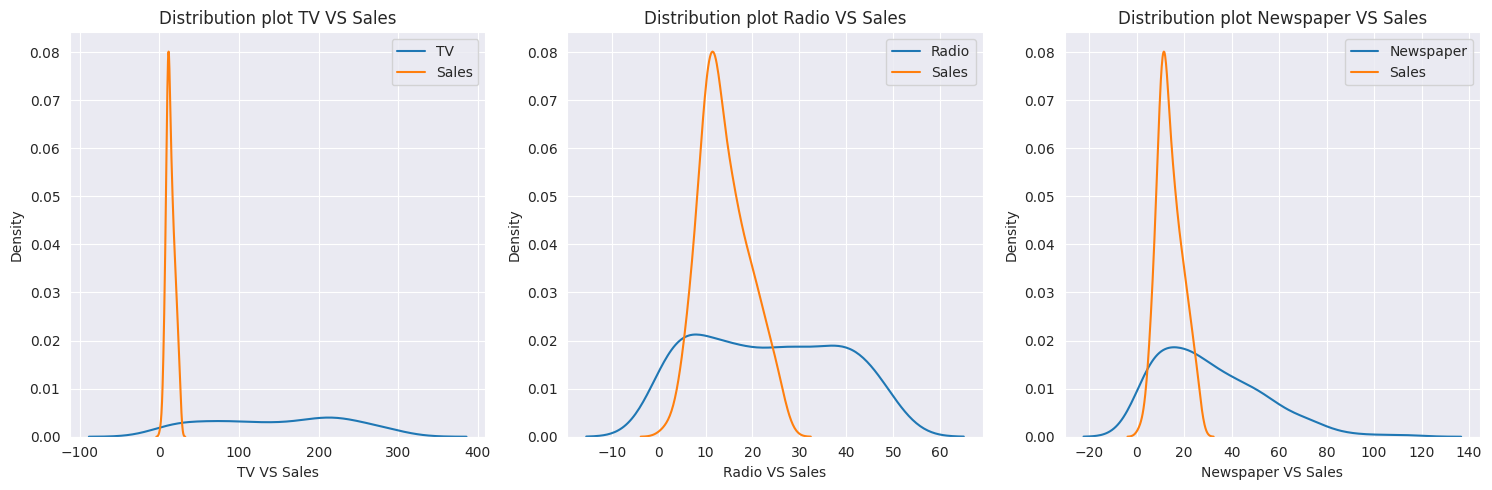

In [13]:
#distplot
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


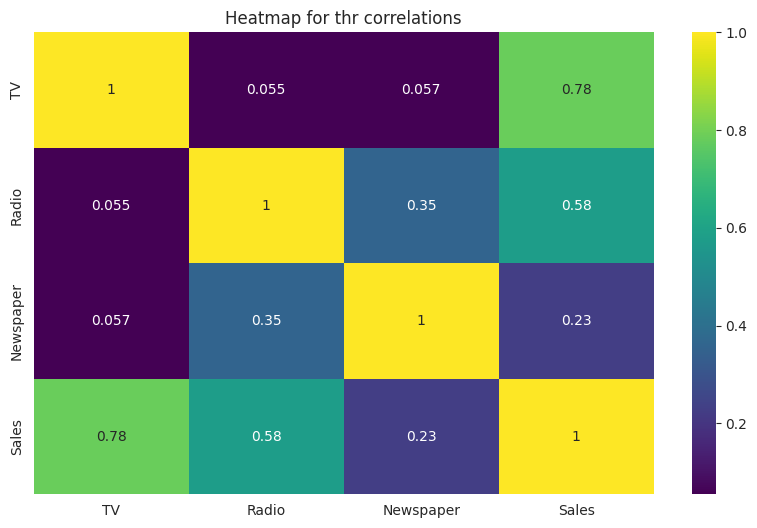

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Heatmap for thr correlations")
plt.show()

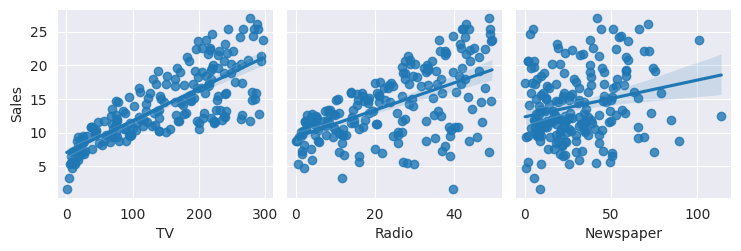

In [16]:
sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'],y_vars="Sales", kind="reg",palette="pastel")
plt.show()

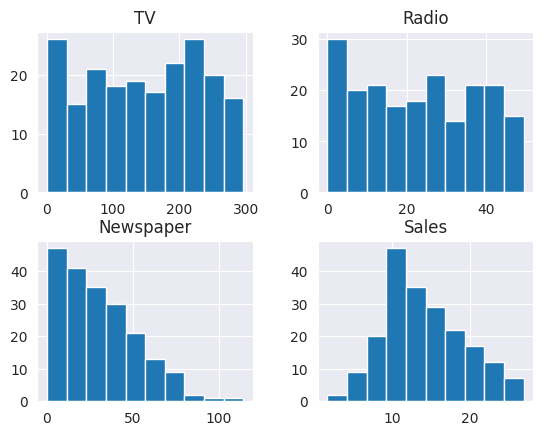

In [17]:
df.hist()
plt.show()

In [18]:
#x and y values

X=df.drop(columns="Sales", axis=1)
y=df["Sales"]

In [19]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [22]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print()
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))


Enter the TV value: 230.1
Enter the Radio value: 73.2
Enter the Newspaper value: 69.3

Predicted Sales : [9.98311453]


In [26]:
#Taking input and output values
x=df.drop('Sales',axis = 1)
y=df.Sales

In [27]:
#dividing training and testing data set
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.20,random_state=3)

In [28]:
#Building and training machine learning model
clf = RandomForestRegressor()
clf.fit(x_tr, y_tr)

RandomForestRegressor()

In [29]:
#measuring the score value
clf.score(x_ts,y_ts)

0.9814171405825609

In [30]:
#predicting using the model built
tv_val = float(input("Enter TV sales value"))
radio_val = float(input("Enter Radio sales value"))
np_val = float(input("Enter Newspaper sales value"))
print("Estimated Sales value:   ",clf.predict([[tv_val,radio_val,np_val]])[0])

Enter TV sales value230
Enter Radio sales value34
Enter Newspaper sales value56
Estimated Sales value:    20.022000000000006


In [34]:
pred = clf.predict(x_ts)

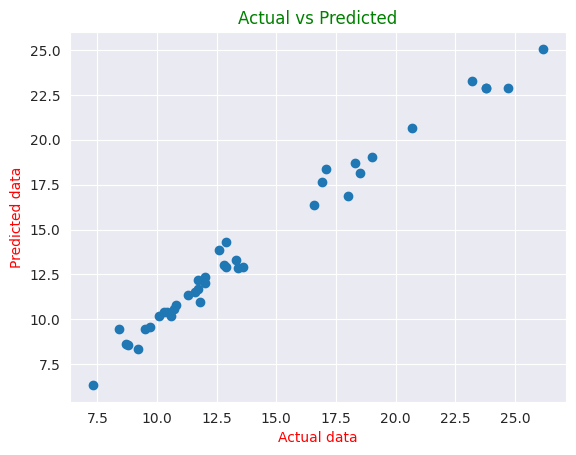

In [35]:
# Relation between actual and predicted values
plt.scatter(y_ts,pred)
plt.title("Actual vs Predicted",color="green")
plt.ylabel("Predicted data",color = "red")
plt.xlabel("Actual data",color = "red")
plt.show()